# Response Generator
____________________

### Neural Machine Translation (Types):

- **`Sequence to Sequence`**
- Sequence to Image (word2VisualVec. Useful incase of better functioning CNNs)
- Image to Sequence (typical image/video captioning networks)

### Sequence to Sequence Networks:

Seq2Seq network is a **`model`** consisting of two separate RNNs called the **`encoder and decoder`**. The encoder reads an input sequence, one item at a time, and outputs a vector at each step. The final output of the encoder is kept as the context vector. The decoder uses this context vector to produce a sequence of outputs one step at a time.

![alt text](http://www.wildml.com/wp-content/uploads/2016/04/nct-seq2seq.png "Logo Title Text 1")

### The Core Model:

#### - `What?` 

*`RNN`* or Recurrent Neural Network is a neural network where the output not only depends on the current input, but to a series of input given in the past
#### - `Why?` 

Since the output is influenced by a series of past inputs, it makes RNN very effective in Natural Language Processing

#### - `How?`
![alt text](http://karpathy.github.io/assets/rnn/diags.jpeg "Logo Title Text 1")

#### - `Types and why?` 

Vanilla RNN faces the problem of [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) which paved the way for LSTMs (and further GRUs) that handles the problem very well due to the introduction of memory cells and gates

### AddOns:

#### - Attention Mechanism?
![alt text](https://theneuralperspective.files.wordpress.com/2016/11/screen-shot-2016-11-19-at-5-27-39-pm.png "Logo Title Text 1")

#### - Beam Search?

**_Why?_** Decoding the most likely output sequence involves searching through all the possible output sequences based on their likelihood. The size of the vocabulary is often tens or hundreds of thousands of words, or even millions of words. Therefore, the search problem is exponential in the length of the output sequence and is intractable (`NP-complete`) to search completely.

**_What?_** A search over the sequence of output probabilities that expands all possible next steps and keeps the `k` most likely, where `k` is a user-specified beam-size parameter that controls the number of beams or parallel searches.

#### - Evaluation Methods?

##### Accuracy (BLEU)
**Compare n-grams of the candidate with the n-grams of the reference translation and count the number of matches**. These matches are position-independent. The more the matches, the better the candidate translation is.

However, systems can overgenerate “reasonable” words. To fix that, we first compute the n-gram matches sentence by sentence. Next, we add the clipped n-gram counts for all the candidate sentences and divide by the number of candidate n-grams in the test corpus to compute a modified precision score, $p_n$, for the entire test corpus.

![alt text](https://nthu-datalab.github.io/ml/labs/13_Sentiment_Analysis_and_Neural_Machine_Translation/imgs/bleu.png "Logo Title Text 1")

There are more advanced metrics like METEOR.

##### Perplexity
Nevertheless, for natural language accuracy methods arent really useful, as there are infinitely many correct answers to a question.

Due to this, we make use of perplexity. Perplexity is the comparison between the distribution over expected and predicted sentences.

### OpenNMT:

#### - `What?`

It is a collection of implementations of deep learning, NLP and speech recognition models, developed and maintained by the [HarvardNLP](http://nlp.seas.harvard.edu/) group. Currently has three main implementations (`OpenNMT-lua`, `OpenNMT-py`, `OpenNMT-tf`).

#### - `Why?`

- It is a general-purpose interface; requiring only source/target files
- Provides configurable models and training procedures
- Tweakable!


_______________________

### Tutorial?!

#### - Dataset:
Cornell Movie dialogues corpus: http://www.cs.cornell.edu/~cristian//Cornell_Movie-Dialogs_Corpus.html

#### - Parsing Method:

- We did not tokenize or stem the data (`needed the input to remain subtly human`)
- We discriminate punctuation from the words (`to make sure responses do not contain these contextual additions` ex: **`,!`**)
- We handled `&apos;` and `quotes` the HTML way to differentiate them from usual punctuation
- Splits the dataset into source and target sets (also to respective train, test and validation sets (`80%, 10%, 10%`))

Can be run using (dataset should be present in the same file):
```python
python data/movie_lines_data/parser.py
```

#### - Preprocess Data: 
`preprocess the dataset such that source and target are aligned and use the same dictionary`

In [1]:
!python preprocess.py \
        -train_src data/movie-src-train.txt \
        -train_tgt data/movie-tgt-train.txt \
        -valid_src data/movie-src-val.txt \
        -valid_tgt data/movie-tgt-val.txt \
        -save_data data/movie

Please backup exisiting pt file: data/movie.train*.pt, to avoid tampering!


#### - Verifying Data

In [2]:
!head -n 3 data/movie-src-train.txt

You are a Catholic ??
No , no , whoa !
Blue Five , break off your cover attack . It &apos;s too late . Make your own run on the exhaust port . Do you copy , Luke ?


#### - Train model

In [13]:
!python train.py -data data/movie -save_model movie-model -gpuid 0 -epochs 25 -encoder_type brnn

ArgumentParser(prog='train.py', usage=None, description='train.py', formatter_class=<class 'argparse.ArgumentDefaultsHelpFormatter'>, conflict_handler='error', add_help=True)
Loading train dataset from data/movie.train.1.pt, number of examples: 57813
 * vocabulary size. source = 27584; target = 27509
Building model...
Intializing model parameters.
NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(27584, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 250, num_layers=2, dropout=0.3, bidirectional=True)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(27509, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3)
      (layers): ModuleList(
        (0): LSTMCell(1000, 500)
       

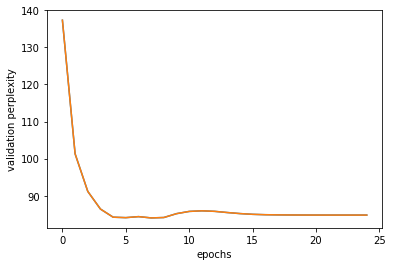

In [9]:
perplexities = []
with open('tmp_perplx') as f:
    for line in f:
        perplexities.append(float(line))

import matplotlib.pyplot as plt
plt.plot(perplexities)
plt.xlabel('epochs')
plt.ylabel('validation perplexity')
plt.show()

#### - Predict

In [1]:
!python translate.py -model movie-model_acc_0.00_ppl_83.81_e13.pt -src data/movie-src-test.txt -output movie-pred.txt -replace_unk -verbose

Loading model parameters.
average src size 13.53148895671294 30471
/u/74/surikua1/unix/anaconda3/lib/python3.6/site-packages/torchtext/data/field.py:321: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train), lengths
/u/74/surikua1/unix/anaconda3/lib/python3.6/site-packages/torchtext/data/field.py:322: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train)
/m/home/home7/74/surikua1/unix/code/OpenNMT-py/OpenNMT-py/onmt/translate/Translator.py:254: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  def var(a): return Variable(a, volatile=True)
/m/home/home7/74/surikua1/unix/code/OpenNMT-py/OpenNMT-py/onmt/Models.py:665: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  for e in self._all]
PRED SCORE: -7.4838

SENT 1: ('Oh', 'Sidney', '.

### References:

- https://medium.com/botsupply/generative-model-chatbots-e422ab08461e
- http://www.wildml.com/2016/04/deep-learning-for-chatbots-part-1-introduction/
- https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/
- https://github.com/spro/practical-pytorch/blob/master/seq2seq-translation/seq2seq-translation.ipynb
- https://machinelearningmastery.com/calculate-bleu-score-for-text-python/
https://nthu-datalab.github.io/ml/labs/13_Sentiment_Analysis_and_Neural_Machine_Translation/13_Sentiment_Analysis_and_Neural_Machine_Translation.html
- https://towardsdatascience.com/the-fall-of-rnn-lstm-2d1594c74ce0